# Installation

You must install [Inkscape](https://inkscape.org/) to enable the magic function to the convert eps file to displayed in Ipython Notebook.


Then loding the magics function

In [8]:
%reload_ext freefem_magic

Now we run some simple example,

In [9]:
%%freefem
cout << "Hello FreeFem++\n" << endl;

-- FreeFem++ v  3.440000 (date 25 févr. 2016 10:12:44)
 Load: lg_fem lg_mesh lg_mesh3 eigenvalue 
 sizestack + 1024 =1072  ( 48 )

Hello FreeFem++

times: compile 0.007s, execution 0.001s,  mpirank:0
 ######## We forget of deleting   -1 Nb pointer,   0Bytes  ,  mpirank 0, memory leak =0
 CodeAlloc : nb ptr  2543,  size :350376 mpirank: 0
Ok: Normal End



-- FreeFem++ v  3.440000 (date 25 févr. 2016 10:12:44)
 Load: lg_fem lg_mesh lg_mesh3 eigenvalue 
(load: loadLibary iovtk = 0) load: iovtk 
Write Mesh and Solutions in VTK Formats
 sizestack + 1024 =1736  ( 712 )

  -- Square mesh : nb vertices  =1681 ,  nb triangles = 3200 ,  nb boundary edges 160
GMRES converges: 616 2.65802e-009 0.00268368 9.90436e-007 < 1e-006
  -- Solve : 
          min 5.49917e-014  max 0.0736713
 0x462c650 VTK_FILE 1
times: compile 0.005s, execution 0.724s,  mpirank:0
 CodeAlloc : nb ptr  2627,  size :356144 mpirank: 0
Ok: Normal End

Background RRGGBBAA: ffffff00
Area 0:0:745:526.25 exported to 745 x 526 pixels (90 dpi)
Bitmap saved as: Laplace.eps.png



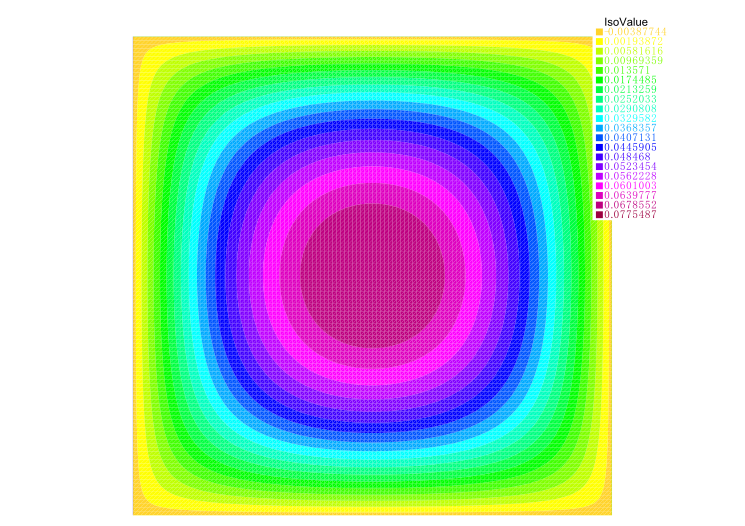

In [10]:
%%freefem --display Laplace.eps --write laplace.edp
 load "iovtk"
 mesh Th=square(40,40);
 fespace Vh(Th,P2);     // P1 FE space
 Vh uh,vh;              // unkown and test function. 
 func f=1;                 //  right hand side function 
 func g=0;                 //  boundary condition function
 
 problem laplace(uh,vh,solver=GMRES,tgv=1e5) =                    //  definion of  the problem 
    int2d(Th)( dx(uh)*dx(vh) + dy(uh)*dy(vh) ) //  bilinear form
  - int2d(Th)( f*vh )                          //  linear form
  + on(1,2,3,4,uh=g) ;                      //  boundary condition form

  laplace; // solve the problem plot(uh); // to see the result
  plot(uh,ps="Laplace.eps",value=true,fill=1);
  savevtk("Laplace.vtk", Th, uh,dataname="uh");